In [2]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Veri Okuma

In [3]:
# veri setini pandas dataframe'ine okuyalım
pokemon = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/pokemon.csv")

In [4]:
pokemon.head()

,id,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,generation,is_legendary
0,1,Bulbasaur,grass,poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,grass,poison,60,62,63,80,80,60,1,0
2,3,Venusaur,grass,poison,80,100,123,122,120,80,1,0
3,4,Charmander,fire,NaN,39,52,43,60,50,65,1,0
4,5,Charmeleon,fire,NaN,58,64,58,80,65,80,1,0


# Veri Analizi

## Hangi pokemon en yüksek saldırı (attack) gücüne sahip?

In [65]:
index = pokemon["attack"].idxmax()
print(pokemon.iloc[index])

id                    214
name            Heracross
type1                 bug
type2            fighting
hp                     80
attack                185
defense               115
sp_attack              40
sp_defense            105
speed                  75
generation              2
is_legendary            0
Name: 213, dtype: object


In [5]:
"""
En yüksek saldırı gücü olan pokemonun adı "Heracross"
Dövüş (fighting) pokemonu olması mantıklı, saldırgan bir pokemon
En yüksek saldırı gücünün efsanevi olmayan bir pokemonda olması şaşırtıcı!
""";

## Saldırı ve savunma güçleri eşit olan pokemonlar kaç tane?

In [64]:
pokemonlar = pokemon[pokemon["attack"] == pokemon["defense"]]
print(len(pokemonlar))

75


## Jenerasyonlardaki pokemon sayılarının dağılımı nedir? (Görselleştirme yapabilirsiniz)

<IPython.core.display.Javascript object>


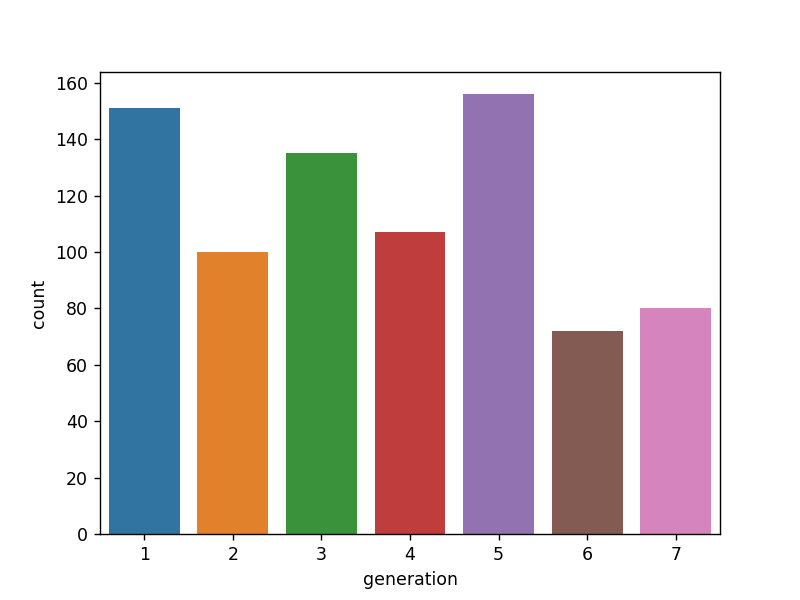

In [79]:
# seaborn ile direkt görselleştirelim
plt.figure()
sns.countplot(x="generation", data=pokemon)

## En çok görülen pokemon tipi nedir? (Birincil tipe bakın)

<IPython.core.display.Javascript object>


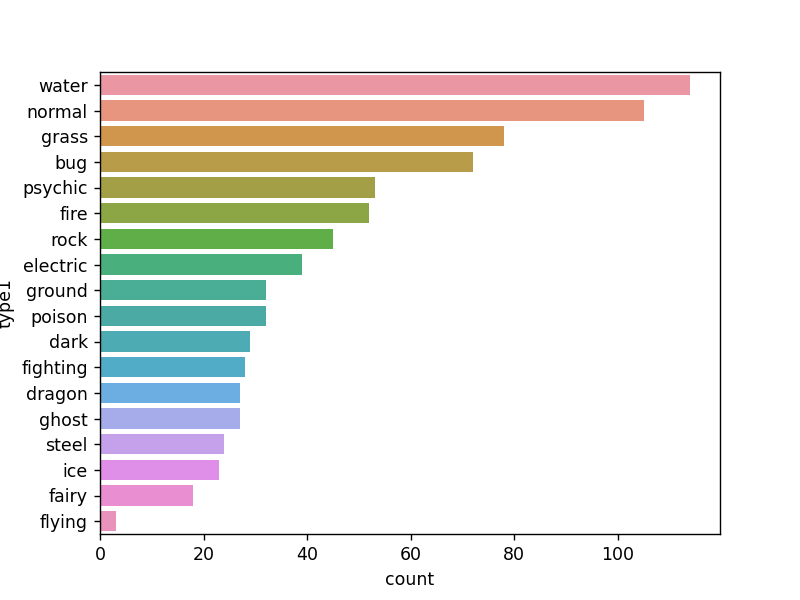

In [85]:
plt.figure()
sns.countplot(y="type1", data=pokemon, orient="h", order=pokemon["type1"].value_counts().index)

## Birlikte en çok görülen tip 1 ve tip 2'ler nelerdir?

<IPython.core.display.Javascript object>


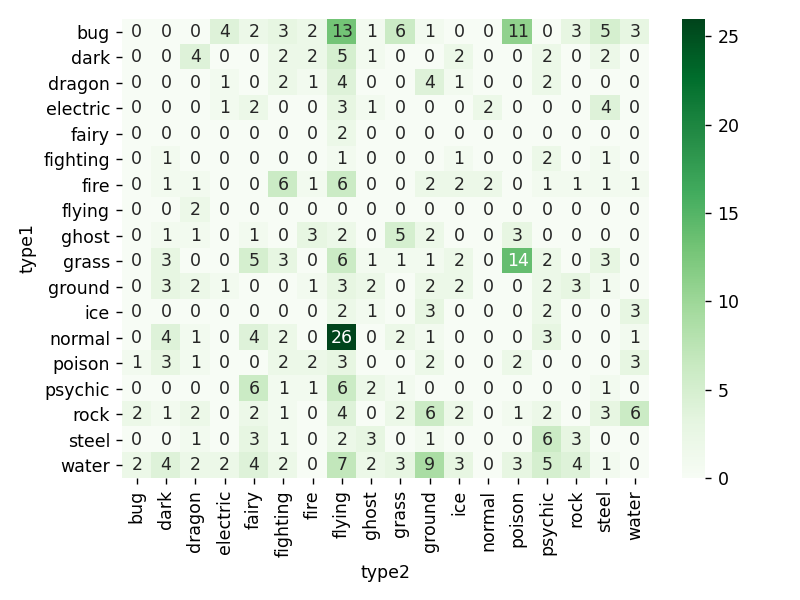

In [100]:
tip1_tip2 = pokemon[["type1", "type2"]].dropna()
count_map = tip1_tip2.groupby(["type1", "type2"]).size().unstack()
count_map.fillna(0, inplace=True)

plt.figure()
sns.heatmap(count_map, annot=True, cmap="Greens")
plt.tight_layout()

## Pokemonların sağlık, saldırı, savunma, özel atak, özel savunma ve hız değerlerini inceleyin. Analiz yapın.

<IPython.core.display.Javascript object>


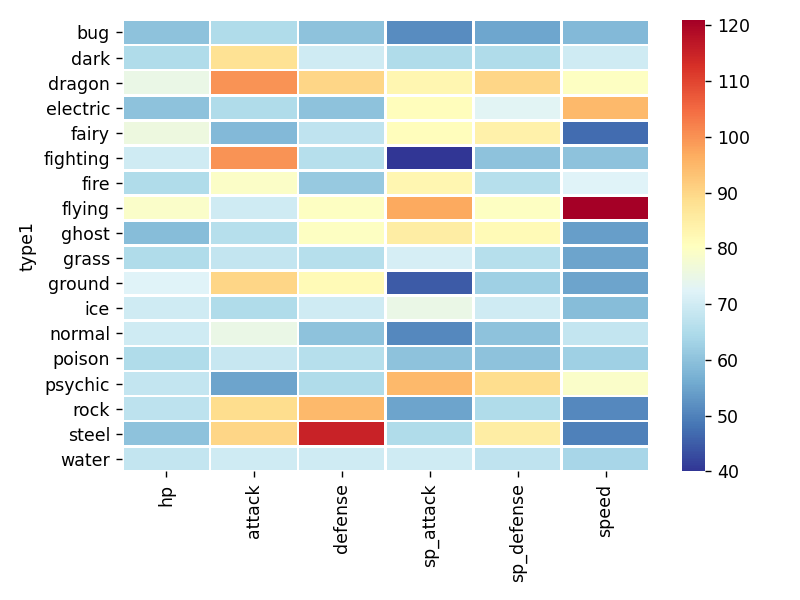

In [106]:
# bu değerlerin ısı haritasını çıkaralım
heatmap = pokemon.groupby("type1").median().loc[:, "hp":"speed"]

plt.figure()
sns.heatmap(heatmap, linewidths=1, cmap="RdYlBu_r")
plt.tight_layout()

<IPython.core.display.Javascript object>


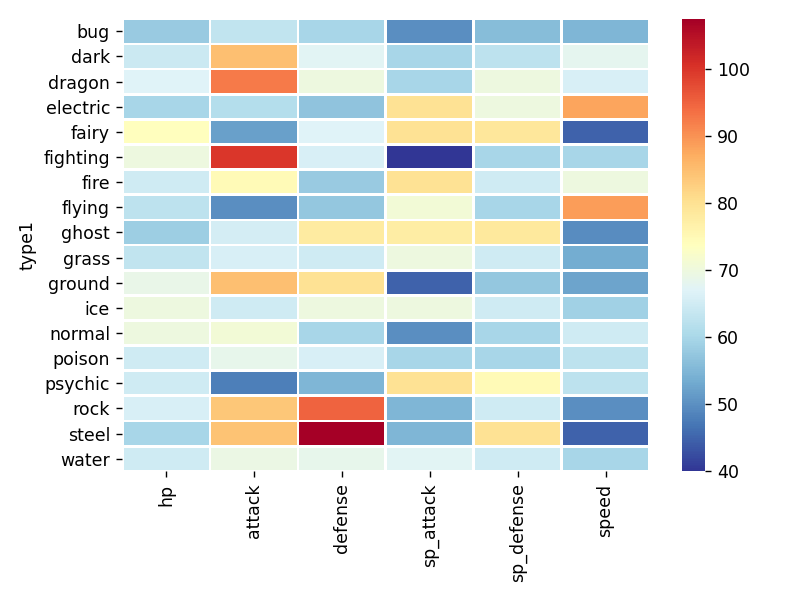

In [107]:
# efsanevi pokemonları çıkartarak bu değerlerin ısı haritasını çıkaralım
# (efsanevi pokemonlar dengeleri bozarak yapıyı değiştirebilir)
no_legend = pokemon[pokemon["is_legendary"] == 0]
heatmap = no_legend.groupby("type1").median().loc[:, "hp":"speed"]

plt.figure()
sns.heatmap(heatmap, linewidths=1, cmap="RdYlBu_r")
plt.tight_layout()

- Saldırı gücü en yüksek olan pokemonlar dövüş (fighting) pokemonları
- Ejderha (dragon) türünün saldırı gücü de yüksek
- Psişik pokemonların saldırı gücü bayağı düşük
- Çelik (steel) ve kaya (rock) türü pokemonların savunma güçleri bayağı yüksek
- Dövüş (fighting) türünün özel saldırı gücü bayağı düşük (özel saldırıları pek yok)
- Peri (fairy) ve çelik (steel) türleri çok yavaş
- Elektrik (electric) ve uçan (flying) pokemonlar çok hızlı